In [2]:
import networkx as nx

import os, sys, glob
import math
import numpy as np
import matplotlib.pyplot as plt

import openfe
from openfe import SmallMoleculeComponent

from rdkit import Chem

In [17]:
ligands = []

for f in glob.glob('*.sdf'):
    sdf = Chem.SDMolSupplier(f, removeHs=False)
    ligands.append(SmallMoleculeComponent(sdf[0]))
    
ligands

[SmallMoleculeComponent(name=mol_2a.sdf),
 SmallMoleculeComponent(name=mol_2b.sdf),
 SmallMoleculeComponent(name=mol_2d.sdf)]

In [96]:
mapper = openfe.LomapAtomMapper(max3d=10.0, element_change=False)
#mapper = openfe.LigandAtomMapper
scorer = openfe.lomap_scorers.default_lomap_score
network_planner = openfe.ligand_network_planning.generate_maximal_network


In [97]:
ligand_network = network_planner(
ligands=ligands[0:],
     mappers=[mapper],
     scorer=scorer
)

ligand_network.edges

frozenset({LigandAtomMapping(componentA=SmallMoleculeComponent(name=mol_2a.sdf), componentB=SmallMoleculeComponent(name=mol_2b.sdf), componentA_to_componentB={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 29, 28: 28, 29: 30, 31: 33, 32: 36, 33: 34, 34: 35, 35: 37, 36: 38, 37: 39, 38: 40}, annotations={'score': 0.9048374180359595}),
           LigandAtomMapping(componentA=SmallMoleculeComponent(name=mol_2b.sdf), componentB=SmallMoleculeComponent(name=mol_2d.sdf), componentA_to_componentB={0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 18: 21, 19: 22, 20: 23, 21: 24, 22: 25, 23: 26, 24: 27, 25: 28, 26: 29, 27: 30, 28: 32, 29: 31, 33: 41, 34: 44, 35: 42, 36: 43, 37: 46, 38: 45, 39: 48, 40: 47}, annotations={'score': 0.33287108369807955}),
           LigandAtomMapping(co

In [98]:
G = nx.Graph()

for edge in ligand_network.edges:
     G.add_edge(edge.componentA.name, edge.componentB.name, weight=round(edge.annotations['score'],2))
        
G.edges(data=True)

EdgeDataView([('mol_2a.sdf', 'mol_2b.sdf', {'weight': 0.9}), ('mol_2a.sdf', 'mol_2d.sdf', {'weight': 0.67}), ('mol_2b.sdf', 'mol_2d.sdf', {'weight': 0.33})])

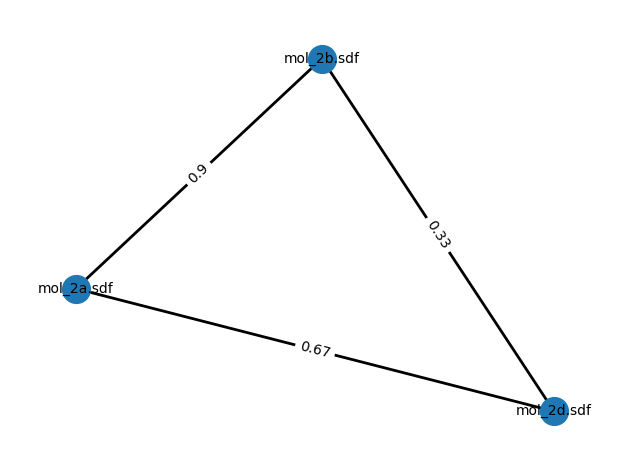

In [99]:
## plotting ------------------

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

## nodes
nx.draw_networkx_nodes(G, pos, node_size=400)

## edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2)

## node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

## edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")

nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [34]:
G.nodes()

NodeView(('mol_2a.sdf', 'mol_2b.sdf', 'mol_2d.sdf'))

In [51]:
import lomap

In [52]:
db_mol = lomap.DBMolecules(".", output=False, name='lomap')
strict, loose = db_mol.build_matrices()
nx_graph = db_mol.build_graph()

INFO:	------------------------------
INFO:	ID 0	mol_2a.sdf
INFO:	ID 1	mol_2b.sdf
INFO:	ID 2	mol_2d.sdf
INFO:	------------------------------
INFO:	Finish reading input files. 3 structures in total....skipped 0

INFO:	
Matrix scoring in progress....

INFO:	Processing molecules: mol_2a.sdf-mol_2b.sdf
INFO:	MCSR from MCS size 24, molecule sizes 24,25 is 0.904837
INFO:	atomic number score from 0 mismatches is 1.000000
INFO:	hybridization score from 0 mismatches is 1.000000
INFO:	sulfonamide score is 1.000000
INFO:	heterocycle score is 1.000000
INFO:	methyl-to-ring transformation score is 1.000000
INFO:	Processing molecules: mol_2a.sdf-mol_2d.sdf
INFO:	MCSR from MCS size 24, molecule sizes 24,28 is 0.670320
INFO:	atomic number score from 0 mismatches is 1.000000
INFO:	hybridization score from 0 mismatches is 1.000000
INFO:	sulfonamide score is 1.000000
INFO:	heterocycle score is 1.000000
INFO:	methyl-to-ring transformation score is 1.000000
INFO:	Processing molecules: mol_2b.sdf-mol_2d.sdf
I

In [73]:
H = nx.Graph()

for ea in nx_graph.edges(data=True):
    H.add_edge(ea[0], ea[1], weight=round(nx_graph.edges[ea[0], ea[1]]['similarity'], 2))

In [79]:
for key, value in nx.get_node_attributes(nx_graph, 'fname_comp').items():
    print(key, value)
    mappings = {key:value}
    H = nx.relabel_nodes(H, mappings)
     

H.nodes()

0 mol_2a.sdf
1 mol_2b.sdf
2 mol_2d.sdf


NodeView(('mol_2a.sdf', 'mol_2b.sdf', 'mol_2d.sdf'))

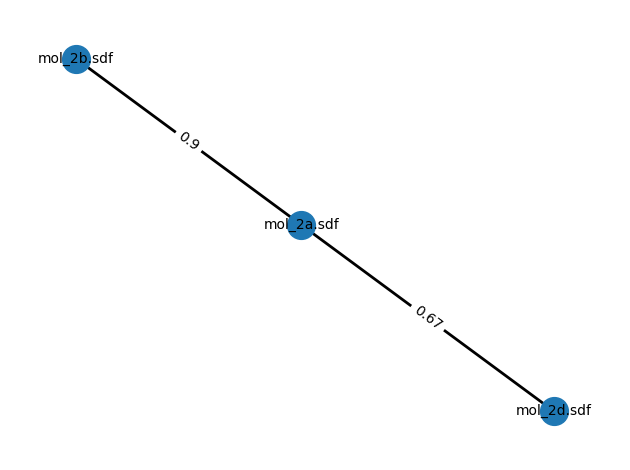

In [80]:
## plotting ------------------

pos = nx.spring_layout(H, seed=7)  # positions for all nodes - seed for reproducibility

## nodes
nx.draw_networkx_nodes(H, pos, node_size=400)

## edges
nx.draw_networkx_edges(H, pos, edgelist=H.edges(), width=2)

## node labels
nx.draw_networkx_labels(H, pos, font_size=10, font_family="sans-serif")

## edge weight labels
edge_labels = nx.get_edge_attributes(H, "weight")

nx.draw_networkx_edge_labels(H, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()